In [3]:
import numpy as np
import sklearn as sk

In [4]:
data_rp = np.load("proyecto_training_data.npy")


In [5]:
import seaborn as sb

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
dataf_rp = pd.DataFrame(data_rp)

In [8]:
dataf_rp.columns

RangeIndex(start=0, stop=6, step=1)

In [9]:
dataf_rp = dataf_rp.rename(columns={0:'SalePrice',1:'OverallQual',2:'1stFlrSF',3:'TotRmsAbvGrd',4:'YearBuilt',5:'LotFrontage'})

In [10]:
p_train=0.8
dataf_rp['is_train'] = np.random.uniform(0,1,len(dataf_rp)) <= p_train
train = dataf_rp[dataf_rp['is_train']==True]
test = dataf_rp[dataf_rp['is_train']==False]

In [11]:
columnas = train.columns

datosrev = train.select_dtypes([int, float])

print(datosrev)

      SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  LotFrontage
0      208500.0          7.0     856.0           8.0     2003.0         65.0
2      223500.0          7.0     920.0           6.0     2001.0         68.0
3      140000.0          7.0     961.0           7.0     1915.0         60.0
4      250000.0          8.0    1145.0           9.0     2000.0         84.0
7      200000.0          7.0    1107.0           7.0     1973.0          NaN
...         ...          ...       ...           ...        ...          ...
1454   185000.0          7.0    1221.0           6.0     2004.0         62.0
1456   210000.0          6.0    2073.0           7.0     1978.0         85.0
1457   266500.0          7.0    1188.0           9.0     1941.0         66.0
1458   142125.0          5.0    1078.0           5.0     1950.0         68.0
1459   147500.0          5.0    1256.0           6.0     1965.0         75.0

[1156 rows x 6 columns]


In [12]:
datosrev = train.select_dtypes([int, float])
columnas = datosrev.columns
for i in columnas:
    media=np.mean(datosrev[i])
    maximo=np.max(datosrev[i])
    minimo=np.min(datosrev[i])
    rango= maximo - minimo 
    desviacions = np.std(datosrev[i])
    print(f"para la variable {i} la media es {media} el maximo es {maximo} el minimo es {minimo} el rango es {rango} y el desviacion estandar es {desviacions}" )

para la variable SalePrice la media es 181331.70415224915 el maximo es 755000.0 el minimo es 34900.0 el rango es 720100.0 y el desviacion estandar es 78320.85668248413
para la variable OverallQual la media es 6.1133217993079585 el maximo es 10.0 el minimo es 1.0 el rango es 9.0 y el desviacion estandar es 1.3574588398848504
para la variable 1stFlrSF la media es 1161.4204152249135 el maximo es 4692.0 el minimo es 372.0 el rango es 4320.0 y el desviacion estandar es 392.32948346645986
para la variable TotRmsAbvGrd la media es 6.519896193771626 el maximo es 14.0 el minimo es 3.0 el rango es 11.0 y el desviacion estandar es 1.6292478117618683
para la variable YearBuilt la media es 1971.5415224913495 el maximo es 2009.0 el minimo es 1872.0 el rango es 137.0 y el desviacion estandar es 30.287620761367858
para la variable LotFrontage la media es 70.52123142250531 el maximo es 313.0 el minimo es 21.0 el rango es 292.0 y el desviacion estandar es 25.437552597201698


In [13]:
import matplotlib.pyplot as plt

In [ ]:
datosrev = train.select_dtypes([int, float])

for i, col in enumerate(datosrev.columns):
    plt.figure(i)
    sb.histplot(x=col, data=train)

    
    



In [ ]:
datosrev = train.select_dtypes([int, float])
columnas = datosrev.columns
for i in columnas:
    MCoef_Corr = np.corrcoef(datosrev['SalePrice'], datosrev[i])
    Coef_Corr  = MCoef_Corr[0,1]
    plt.figure(i)
    plt.scatter(datosrev['SalePrice'], datosrev[i])
    plt.title(f"Variable {i} con coeficiente de correlacion {Coef_Corr}")




In [14]:
#obtener la matriz de x
M_OverallQual=[]
for i in train['OverallQual']:
    M_OverallQual.append([i,1])    #este codigo genera una lista 
M_OverallQual = np.array(M_OverallQual)  #luego la volvermos arreglo 
#M_OverallQual = M_OverallQual[:,0]  #vuelve el arreglo de tamaño (n,)
#Unos= np.ones(len(train))  #genera un arreglo de 1s de tamaño (n,)
#Matriz_01 =np.concatenate((M_OverallQual,Unos),axis=0)



In [15]:
M_SalePrice=[]
for i in train['SalePrice']:
    M_SalePrice.append([i])    #este codigo genera una lista 
M_SalePrice = np.array(M_SalePrice)
M_SalePrice = M_SalePrice[:,0]

In [ ]:
#declaracion de variables iniciales 
b_1 = 40000
b_0 = 1
iteraciones=250
imprimer_error_cada = 10
alfa=0.05

z=-1
Salida = pd.DataFrame(columns=['prueba','b0','b1','error_e'])


while z <= iteraciones:
    z= z+1
    res_b1= M_OverallQual[:,0]*b_1
    res_b0 = M_OverallQual[:,1]*b_0
    resultado_01 =res_b1+res_b0

    diferencia = M_SalePrice-resultado_01
    cuadrado = diferencia * diferencia

    suma_error=0
    for i in cuadrado:
        suma_error= i + suma_error
    error=suma_error/(2*len(resultado_01))    

    Salida =  Salida.append({'prueba':z,'b0':b_0,'b1':b_1,'error_e':error},ignore_index=True)

    gradiente_beta_1 = (np.dot(-diferencia , M_OverallQual[:,0]))/(len(diferencia))
    
    suma_diferencias_b0=0
    for i in diferencia:
        suma_diferencias_b0 = i + suma_diferencias_b0
    gradiente_beta_0=suma_diferencias_b0/(len(resultado_01))    

    b_0= b_0 - alfa*(gradiente_beta_0)
    b_1= b_1 - alfa*(gradiente_beta_1)



fig, ax=plt.subplots()
ax.plot(Salida['prueba'],Salida['error_e'])
plt.show()
    
  

In [17]:
from sklearn.linear_model import LinearRegression


In [52]:
X = np.array(train['OverallQual'])
Y = np.array(train['SalePrice'])
X = X.reshape(-1,1)
LR = LinearRegression()
reg = LR.fit(X,Y)
reg.score(X,Y)


Prediccion = LR.predict(X)

<function matplotlib.pyplot.show(close=None, block=None)>

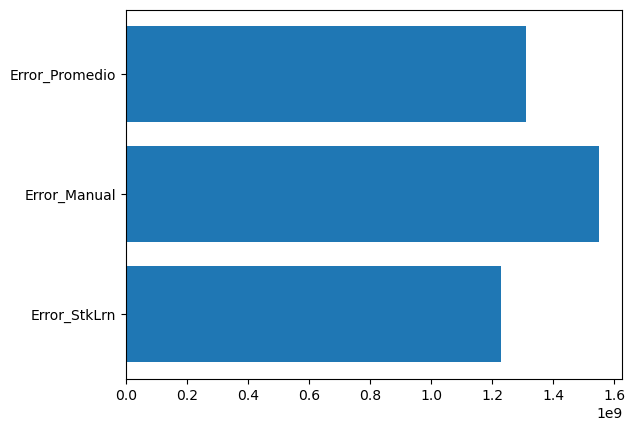

In [101]:

X_1 = np.array(test['OverallQual'])
X_1 = X_1.reshape(-1,1)
Y_1 = np.array(test['SalePrice'])
Prediccion_StkLrn = (LR.predict(X_1))



M_OverallQual_test=[]
for i in test['OverallQual']:
    M_OverallQual_test.append([i,1])    #este codigo genera una lista 
M_OverallQual_test = np.array(M_OverallQual_test) 

Pos_Error_Minimo =Salida['error_e'].idxmin()
b1_min_manual = Salida.loc[Pos_Error_Minimo,'b1']
b0_min_manual = Salida.loc[Pos_Error_Minimo,'b0']
res_b1_min= M_OverallQual_test[:,0]*b1_min_manual
res_b0_min= M_OverallQual_test[:,1]*b0_min_manual
Prediccion_Manual =(res_b1_min+res_b0_min)



Predicciones_Unificada = pd.DataFrame()

Predicciones_Unificada['StkLrn']=Prediccion_StkLrn.tolist()
Predicciones_Unificada['Manual']=Prediccion_Manual.tolist()
Predicciones_Unificada['Promedio']= ((Predicciones_Unificada['StkLrn']+Predicciones_Unificada['Manual'])/2)
Predicciones_Unificada['SalePrice']=Y_1.tolist()
Predicciones_Unificada['Error_StkLrn']= ((Predicciones_Unificada['StkLrn']-Predicciones_Unificada['SalePrice'])*(Predicciones_Unificada['StkLrn']-Predicciones_Unificada['SalePrice']))
Predicciones_Unificada['Error_Manual']= ((Predicciones_Unificada['Manual']-Predicciones_Unificada['SalePrice'])*(Predicciones_Unificada['Manual']-Predicciones_Unificada['SalePrice']))
Predicciones_Unificada['Error_Promedio']= ((Predicciones_Unificada['Promedio']-Predicciones_Unificada['SalePrice'])*(Predicciones_Unificada['Promedio']-Predicciones_Unificada['SalePrice']))


Error_StkLrn    = (Predicciones_Unificada['Error_StkLrn'].sum())/(2*len(Predicciones_Unificada)) 
Error_Manual    = (Predicciones_Unificada['Error_Manual'].sum())/(2*len(Predicciones_Unificada)) 
Error_Promedio  = (Predicciones_Unificada['Error_Promedio'].sum())/(2*len(Predicciones_Unificada))


Errores = [Error_StkLrn,Error_Manual,Error_Promedio]
nombre_Errores = ['Error_StkLrn','Error_Manual','Error_Promedio']
plt.barh(nombre_Errores,Errores)
plt.show


